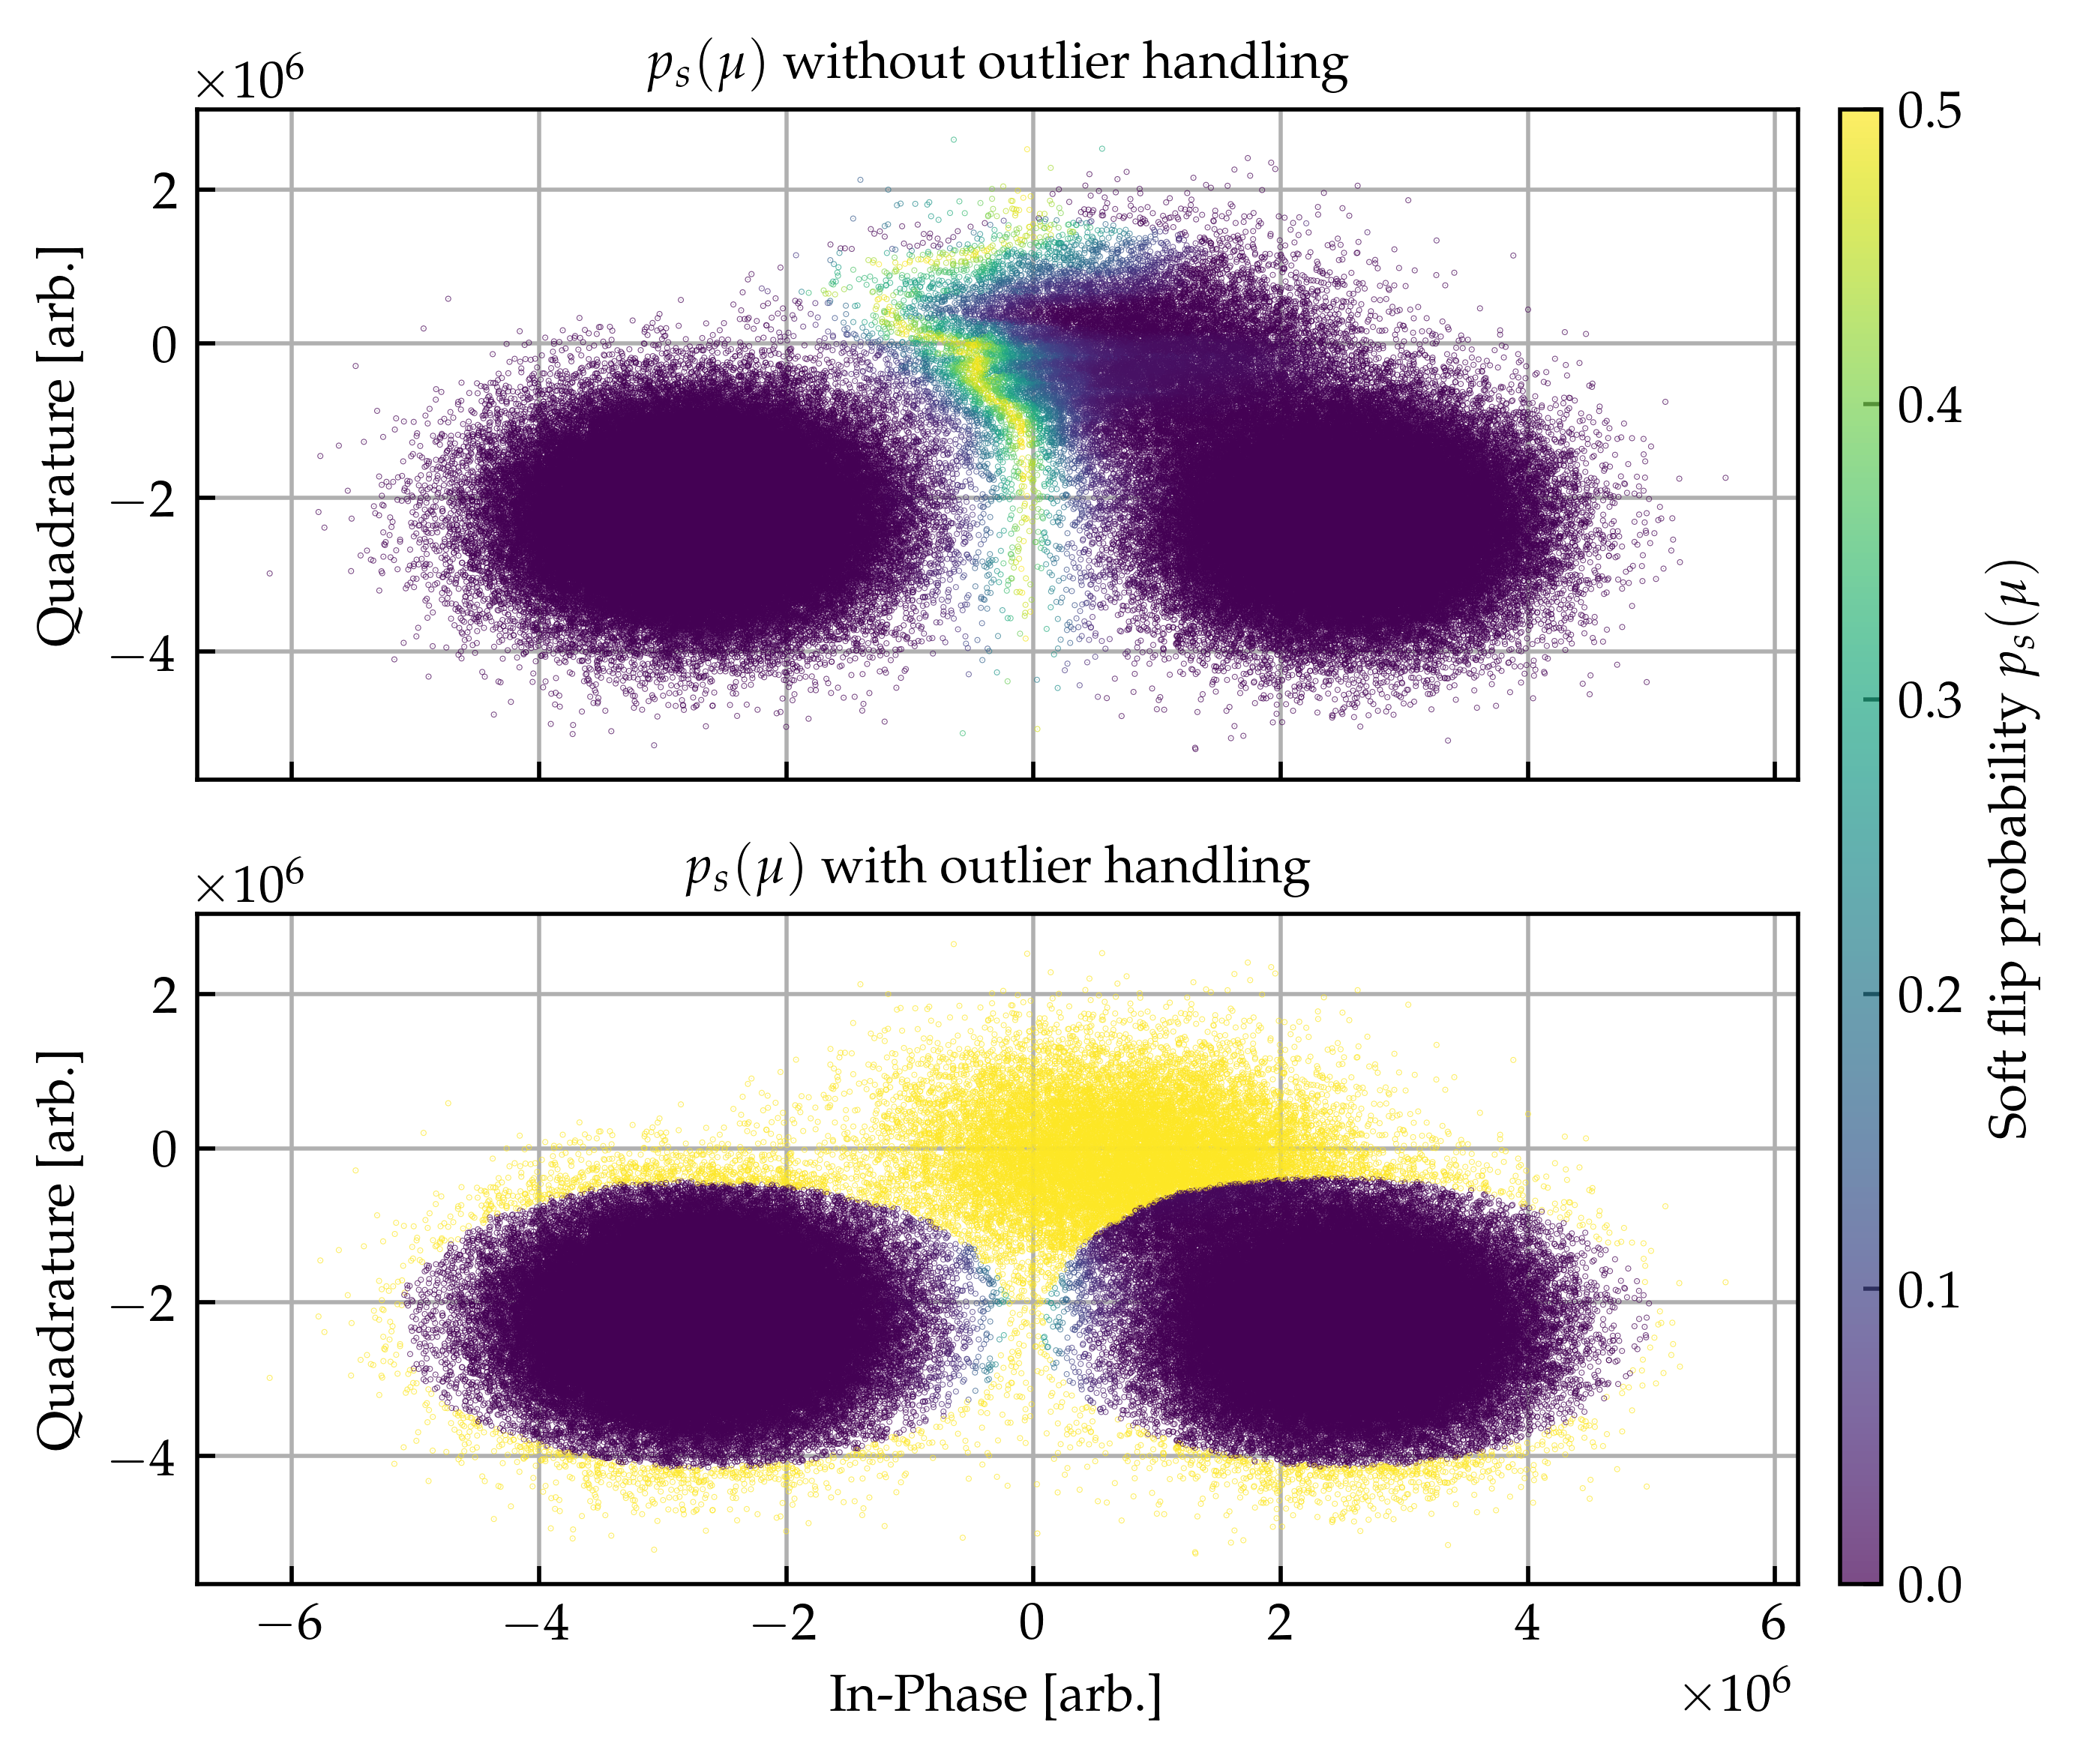

In [14]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import cpp_soft_info as csi
from dev.dec import process_pSoft
from soft_info import plot_IQ_data_pSoft_cmap, save_plot, apply_formatting, plot_double_IQ_scatter_outlier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

DEVICE = 'ibm_sherbrooke'
ROUNDS = 100
threshold = 0.01


qubit = 3

LOGICAL = '0'
XBASIS = False
file_name = f"../results/Leakage/Correct_{DEVICE}_{LOGICAL}_{XBASIS}_{ROUNDS}.pkl"
with open(file_name, 'rb') as f:
    (pSofts, countMats, estim0Mats, estim1Mats, inverted_q_maps, big_memories) = pickle.load(f)
n_shots = 2_000
pSoft = np.vstack(pSofts)[:n_shots]
big_memory = np.vstack(big_memories)[:n_shots]
estim0Mat = np.vstack(estim0Mats)[:n_shots]
estim1Mat = np.vstack(estim1Mats)[:n_shots]

pSoft_outlier, ratio = process_pSoft(pSoft, estim0Mat, estim1Mat, threshold=threshold)


inverted_q_map = inverted_q_maps[0]
cols = inverted_q_map[qubit]
# fig = plot_IQ_data_pSoft_cmap(big_memory[:, cols], pSoft_trunc[:, cols], alpha=0.7)
fig = plot_double_IQ_scatter_outlier(big_memory[:, cols], pSoft[:, cols], pSoft_outlier[:, cols], dpi=500)
save_plot(fig, f"4_RepetitionCodes/IQ_outlier_handling.pdf", format="pdf")


In [ ]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import cpp_soft_info as csi
from dev.dec import process_pSoft
from soft_info import plot_IQ_data_pSoft_cmap, save_plot, apply_formatting, plot_double_IQ_scatter_outlier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

DEVICE = 'ibm_sherbrooke'
ROUNDS = 100
threshold = 0.01


qubit = 3

LOGICAL = '0'
XBASIS = False
file_name = f"../results/Leakage/Correct_{DEVICE}_{LOGICAL}_{XBASIS}_{ROUNDS}.pkl"
with open(file_name, 'rb') as f:
    (pSofts, countMats, estim0Mats, estim1Mats, inverted_q_maps, big_memories) = pickle.load(f)
n_shots = 2_000
pSoft = np.vstack(pSofts)[:n_shots]
big_memory = np.vstack(big_memories)[:n_shots]
estim0Mat = np.vstack(estim0Mats)[:n_shots]
estim1Mat = np.vstack(estim1Mats)[:n_shots]

pSoft_outlier, ratio = process_pSoft(pSoft, estim0Mat, estim1Mat, threshold=threshold)


inverted_q_map = inverted_q_maps[0]
cols = inverted_q_map[qubit]
# fig = plot_IQ_data_pSoft_cmap(big_memory[:, cols], pSoft_trunc[:, cols], alpha=0.7)
fig = plot_double_IQ_scatter_outlier(big_memory[:, cols], pSoft[:, cols], pSoft_outlier[:, cols], dpi=1000)
save_plot(fig, f"4_RepetitionCodes/IQ_outlier_handling.png", format="png")


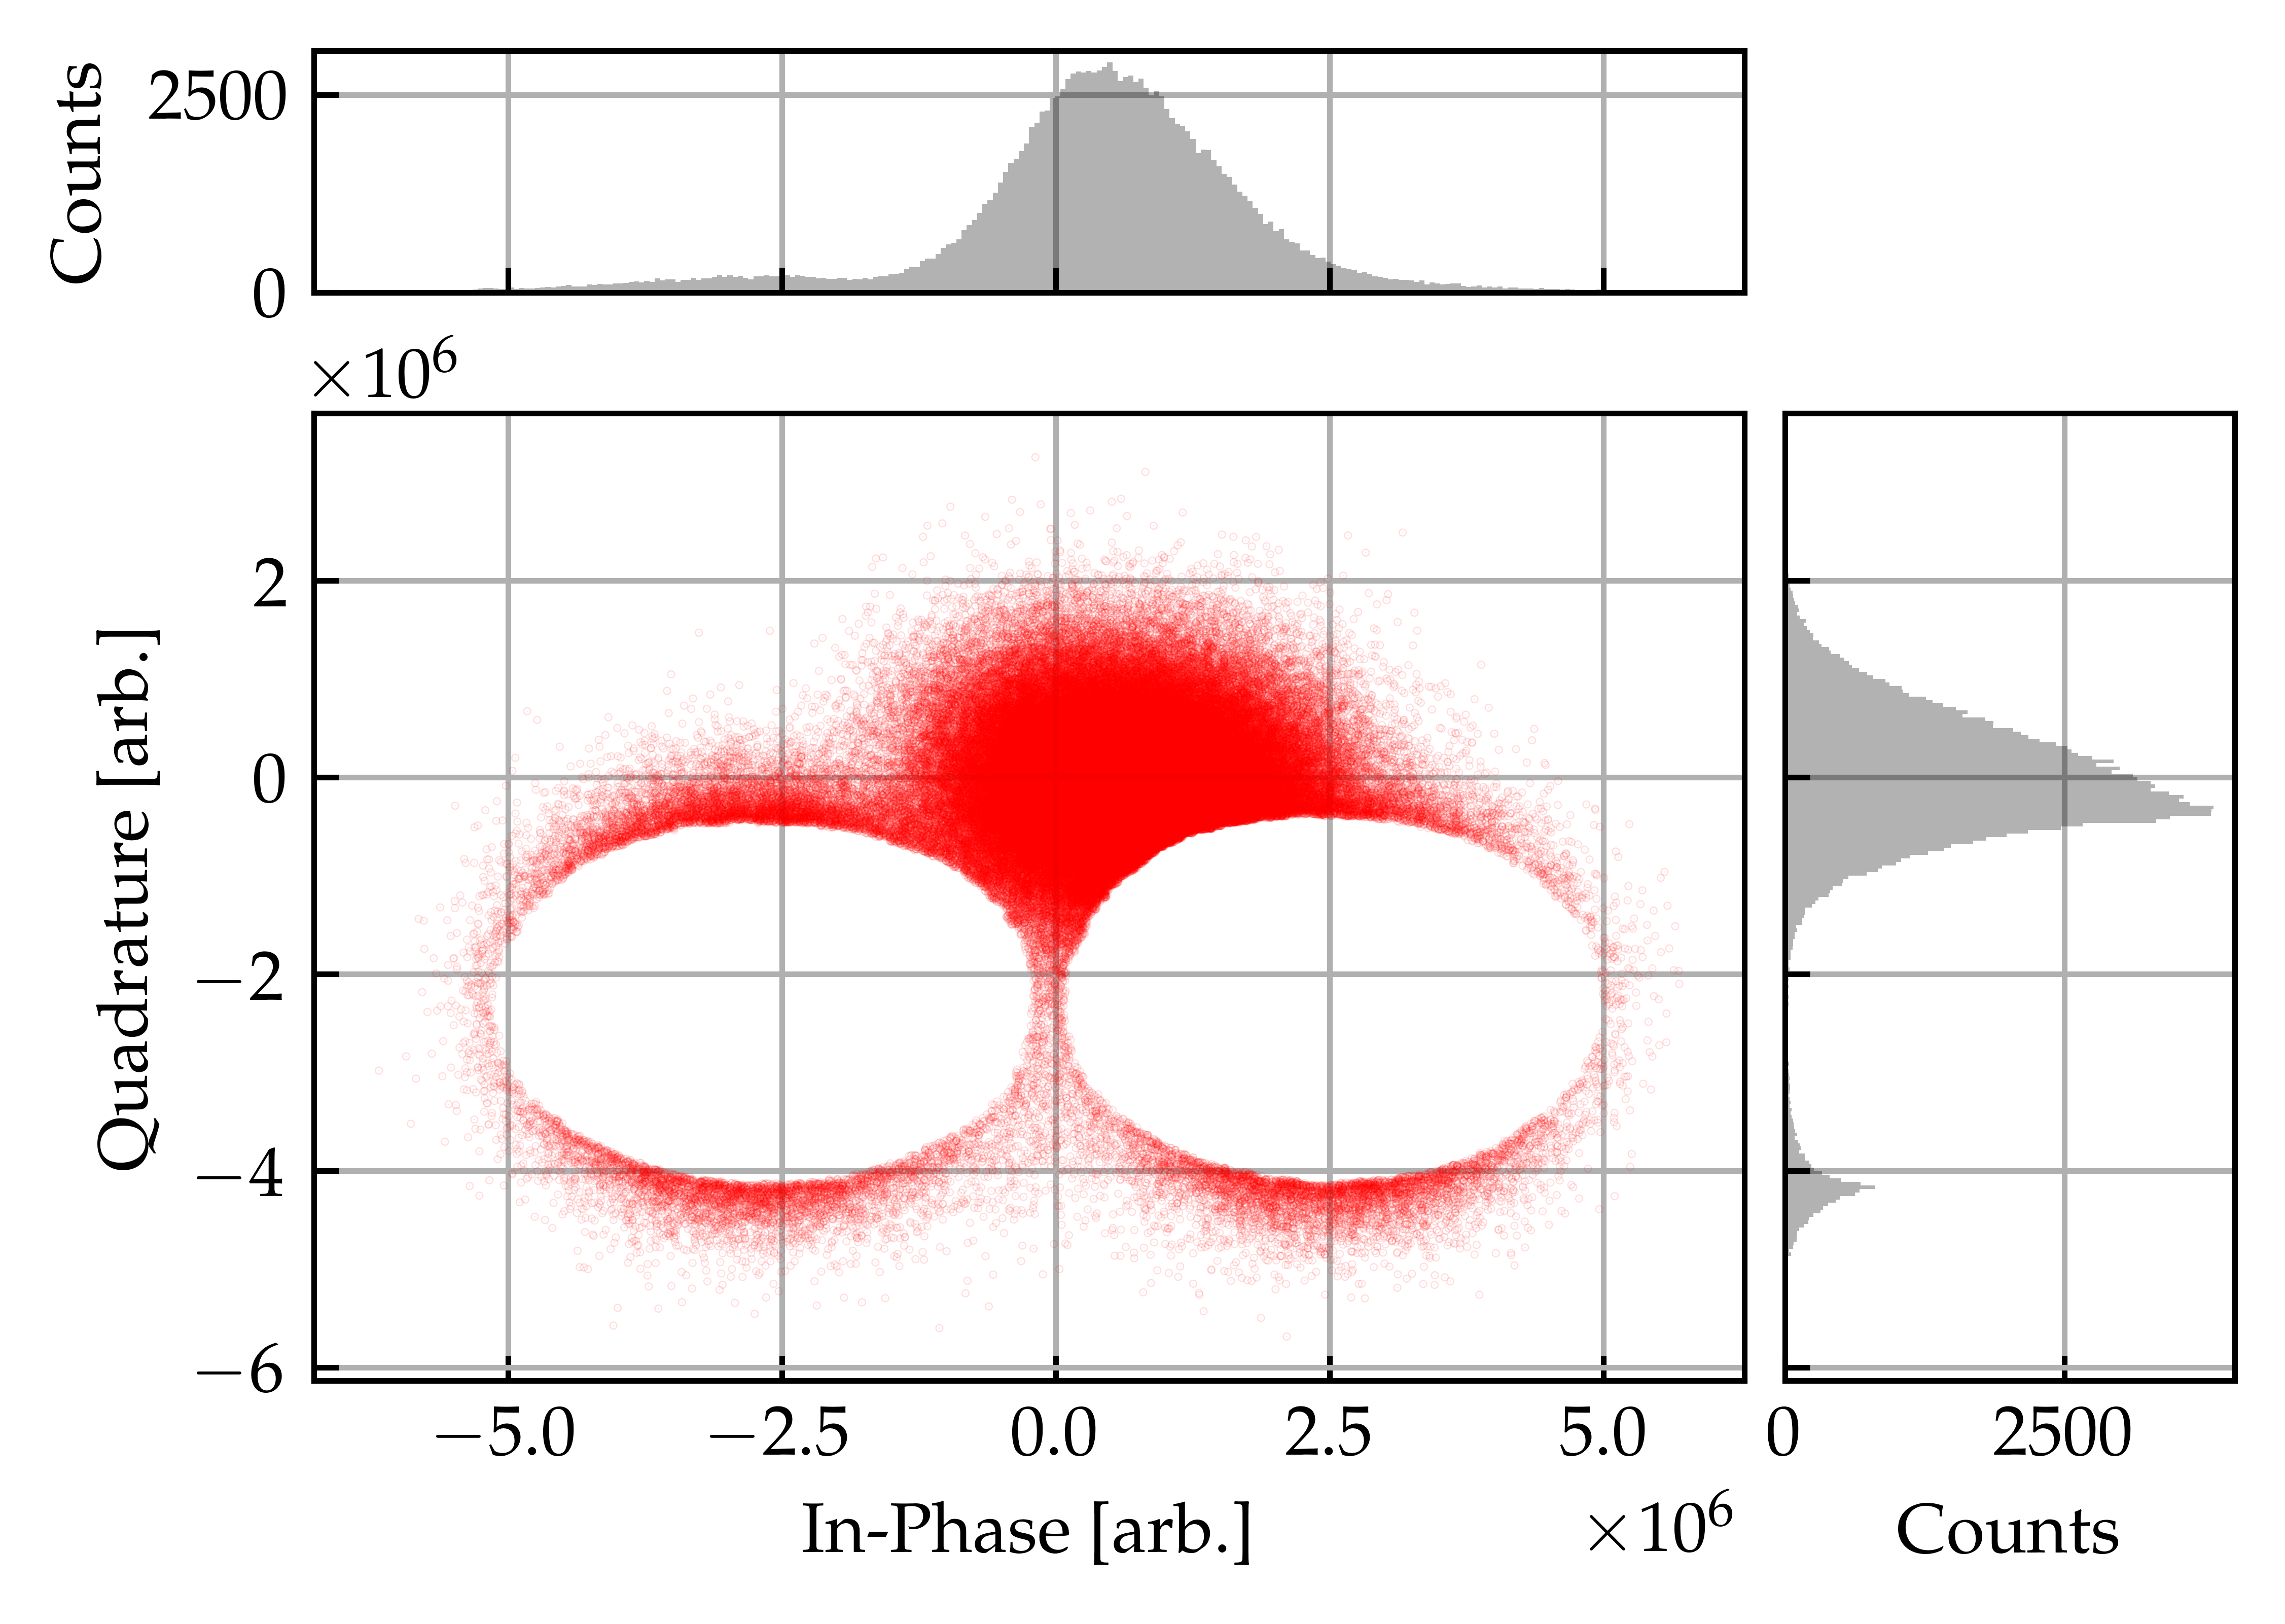

In [36]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import cpp_soft_info as csi
from dev.dec import process_pSoft
from soft_info import plot_IQ_data_pSoft_cmap, save_plot, apply_formatting, plot_double_IQ_scatter_outlier, plot_IQ_data_with_countMat
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

DEVICE = 'ibm_sherbrooke'
ROUNDS = 100
threshold = 0.01


qubit = 3

LOGICAL = '0'
XBASIS = False
file_name = f"../results/Leakage/Correct_{DEVICE}_{LOGICAL}_{XBASIS}_{ROUNDS}.pkl"
with open(file_name, 'rb') as f:
    (pSofts, countMats, estim0Mats, estim1Mats, inverted_q_maps, big_memories) = pickle.load(f)
n_shots = 2000_000
pSoft = np.vstack(pSofts)[:n_shots]
big_memory = np.vstack(big_memories)[:n_shots]
estim0Mat = np.vstack(estim0Mats)[:n_shots]
estim1Mat = np.vstack(estim1Mats)[:n_shots]
countMat = np.vstack(countMats)[:n_shots]


inverted_q_map = inverted_q_maps[0]
cols = inverted_q_map[qubit]
estim0Mat_qubit = estim0Mat[:, cols]
estim1Mat_qubit = estim1Mat[:, cols]

mask = ((estim0Mat_qubit < threshold) & (estim1Mat_qubit < threshold))
outlier_mmr = big_memory[:, cols][mask]
outlier_countMat = countMat[:, cols][mask]
outlier_countMat = np.zeros_like(outlier_countMat)


fig = plot_IQ_data_with_countMat(outlier_mmr, outlier_countMat, dpi = 1000)

save_plot(fig, f"3_soft_information/outlier_detection.pdf", format="pdf")
